## CNN Variation 1

In this norebook (due to recieving a high accuracy number for our model with our CNN baseline) we will be performig differernt kinds of regularizations in the other notebooks

In [1]:
# Import libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("darkgrid")
import os, shutil
from glob import glob

In [2]:
import cv2
from keras.preprocessing.image import ImageDataGenerator

In [3]:
image_gen = ImageDataGenerator(rescale=1./255)

In [4]:
train_dir = '/Users/amirreza/Desktop/Metis_ds_ml/Metis_DSML/Projects/6_Deep_Learning_COVID19_Chest_Xray/output/train'
val_dir = '/Users/amirreza/Desktop/Metis_ds_ml/Metis_DSML/Projects/6_Deep_Learning_COVID19_Chest_Xray/output/val'
test_dir = '/Users/amirreza/Desktop/Metis_ds_ml/Metis_DSML/Projects/6_Deep_Learning_COVID19_Chest_Xray/output/test'

What is differernt with the CNN Baseline:
1. Batch_size have been chosen a bigger number 80 to 256

In [5]:
batch_size = 256
train_generator = image_gen.flow_from_directory(train_dir,
                                          target_size=(150,150),
                                          batch_size=batch_size,
                                          seed=42,
                                          shuffle=False,
                                          class_mode='binary')
val_generator = image_gen.flow_from_directory(val_dir,
                                        target_size=(150,150),
                                        batch_size=batch_size,
                                        seed=42,
                                        shuffle=False,
                                        class_mode='binary')
test_generator = image_gen.flow_from_directory(test_dir,
                                        target_size=(150,150),
                                        batch_size=batch_size,
                                        seed=42,
                                        shuffle=False,
                                        class_mode='binary')

Found 3650 images belonging to 2 classes.
Found 521 images belonging to 2 classes.
Found 1045 images belonging to 2 classes.


## CNN

In [6]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout
from keras import optimizers

In [7]:
model = Sequential()

model.add(Conv2D(32, (3,3),input_shape=(150,150,3),activation='relu'))
model.add(MaxPool2D((2,2)))

model.add(Conv2D(128, (3,3),activation='relu'))
model.add(MaxPool2D((2,2)))

model.add(Conv2D(64, (3,3),activation='relu'))
model.add(MaxPool2D((2,2)))

#model.add(Conv2D(128, (3,3),activation='relu'))
#model.add(MaxPool2D((2,2)))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

2021-12-01 16:24:35.711272: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 128)       36992     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 128)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        73792     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 18496)             0

In [9]:
result = model.fit(
    train_generator,
    #steps_per_epoch=8,
    epochs=30,
    validation_data=val_generator,
    #validation_steps=10
)

2021-12-01 16:25:28.675478: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/30
15/15 [==============================] - 137s 9s/step - loss: 1.3289 - accuracy: 0.5282 - val_loss: 0.6085 - val_accuracy: 0.7428
Epoch 2/30
15/15 [==============================] - 122s 8s/step - loss: 0.6494 - accuracy: 0.7430 - val_loss: 0.5904 - val_accuracy: 0.7428
Epoch 3/30
15/15 [==============================] - 128s 8s/step - loss: 0.8580 - accuracy: 0.7430 - val_loss: 0.5663 - val_accuracy: 0.7428
Epoch 4/30
15/15 [==============================] - 142s 9s/step - loss: 0.6210 - accuracy: 0.7430 - val_loss: 0.5956 - val_accuracy: 0.7428
Epoch 5/30
15/15 [==============================] - 138s 9s/step - loss: 0.5991 - accuracy: 0.7430 - val_loss: 0.5376 - val_accuracy: 0.7428
Epoch 6/30
15/15 [==============================] - 149s 10s/step - loss: 0.6856 - accuracy: 0.7586 - val_loss: 0.4167 - val_accuracy: 0.8599
Epoch 7/30
15/15 [==============================] - 172s 11s/step - loss: 0.4219 - accuracy: 0.8405 - val_loss: 0.3759 - val_accuracy: 0.8349
Epoch 8/30


In [10]:
model.save('model_CNN_Reg_1_data.h5')

## Eval on Model

In [18]:
result.history['accuracy']

[0.5282191634178162,
 0.7430136799812317,
 0.7430136799812317,
 0.7430136799812317,
 0.7430136799812317,
 0.7586301565170288,
 0.8405479192733765,
 0.8449314832687378,
 0.8843835592269897,
 0.9186301231384277,
 0.8649315237998962,
 0.8169863224029541,
 0.8550685048103333,
 0.8846575617790222,
 0.931506872177124,
 0.9200000166893005,
 0.9241095781326294,
 0.9317808151245117,
 0.9454794526100159,
 0.934794545173645,
 0.9504109621047974,
 0.9630137085914612,
 0.9652054905891418,
 0.9712328910827637,
 0.9734246730804443,
 0.9747945070266724,
 0.9767123460769653,
 0.9838356375694275,
 0.9695890545845032,
 0.9873972535133362]

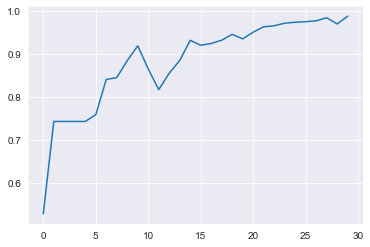

In [19]:
plt.plot(result.history['accuracy'])

In [20]:
model.metrics_names

['loss', 'accuracy']

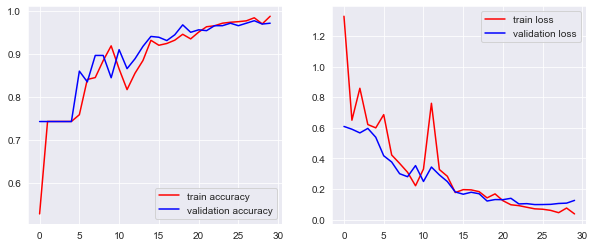

In [21]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)

plt.plot(result.history['accuracy'], label='train accuracy', color='red')
plt.plot(result.history['val_accuracy'], label='validation accuracy', color='blue')
plt.legend()

plt.subplot(1,2,2)
plt.plot(result.history['loss'], label='train loss', color='red')
plt.plot(result.history['val_loss'], label='validation loss', color='blue')
plt.legend()

plt.show()

In [22]:
from sklearn.metrics import confusion_matrix, classification_report

In [3]:
model = load_model('model_mobilenetv2_data.h5')

NameError: name 'load_model' is not defined

In [23]:
prediction = model.predict(test_generator)

In [2]:
import math
num_of_examples = len(test_generator.filenames)
num_of_generator_calls = math.ceil(num_of_examples/(1.0*80))
test_labels=[]
for i in range(0,int(num_of_generator_calls)):
    test_labels.extend(np.array(test_generator[i][1]))

NameError: name 'test_generator' is not defined

In [25]:
train_generator.class_indices

{'NORMAL': 0, 'PNEUMONIA': 1}

In [26]:
confusion_matrix(np.array(test_labels), np.round(prediction))

array([[238,  31],
       [  6, 770]])

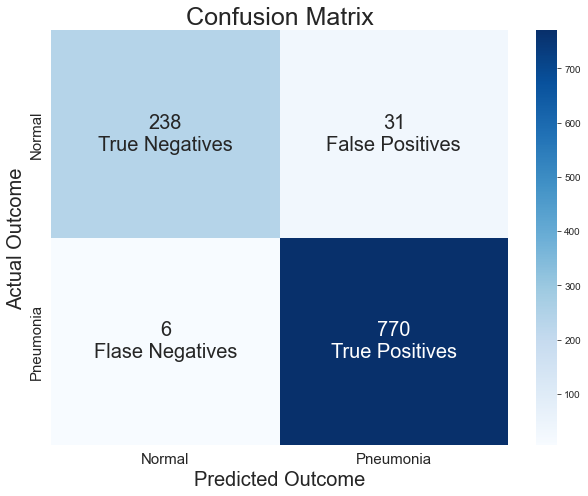

In [27]:
plt.figure(figsize=(25,7))
plt.subplot(131)
ax = sns.heatmap(confusion_matrix(test_generator.labels, prediction.round()),
            annot = True, annot_kws={"size":20}, fmt="d",cmap = "Blues")
cmlabels = ['True Negatives', "False Positives",
               'Flase Negatives', "True Positives"]
for i,t in enumerate(ax.texts):
  t.set_text(t.get_text() + "\n" + cmlabels[i])
plt.title('Confusion Matrix', size=25)
plt.xlabel('Predicted Outcome', size=20)
plt.ylabel('Actual Outcome', size=20)
labels = ['Normal', 'Pneumonia']
ax.set_xticklabels(labels, size=15)
ax.set_yticklabels(labels, size=15)
plt.tight_layout()
plt.show();

In [1]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(test_labels, np.round(prediction)))

NameError: name 'test_labels' is not defined

In [8]:
# Import libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("darkgrid")
import os, shutil
from glob import glob

In [9]:
from keras.models import load_model
from sklearn.metrics import confusion_matrix, classification_report
from keras.preprocessing.image import ImageDataGenerator

In [10]:
model = load_model('model_mobilenetv2_data.h5')

In [11]:
# load the test set for prediction
test_dir = '/Users/amirreza/Desktop/Metis_ds_ml/Metis_DSML/Projects/6_Deep_Learning_COVID19_Chest_Xray/output/test'
image_gen = ImageDataGenerator(rescale=1./255)
test_generator = image_gen.flow_from_directory(test_dir,
                                        target_size=(150,150),
                                        batch_size=80,
                                        seed=42,
                                        shuffle=False,
                                        class_mode='binary')
prediction = model.predict(test_generator)
prediction = np.round(prediction).astype(int)
y_true = test_generator.labels

Found 1045 images belonging to 2 classes.


2021-12-02 19:53:23.469086: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


In [12]:
confusion_matrix(y_true, prediction)

array([[166, 103],
       [  9, 767]])

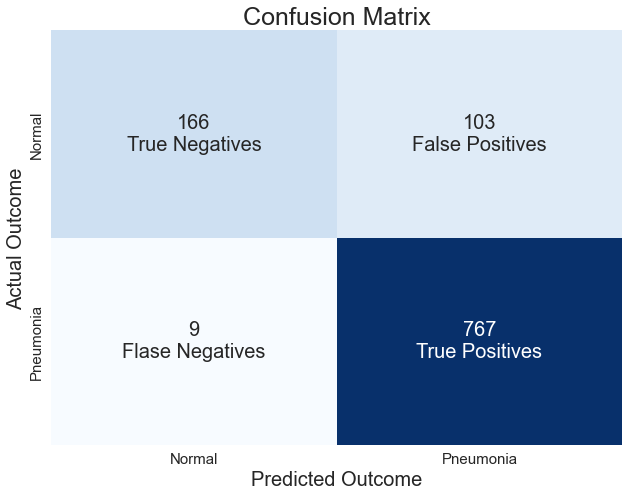

In [13]:
# plotting confusion matrix
plt.figure(figsize=(25,7))
plt.subplot(131)
ax = sns.heatmap(confusion_matrix(test_generator.labels, prediction.round()),
            annot = True, annot_kws={"size":20}, fmt="d",cmap = "Blues",cbar=False)
cmlabels = ['True Negatives', "False Positives",
               'Flase Negatives', "True Positives"]
for i,t in enumerate(ax.texts):
  t.set_text(t.get_text() + "\n" + cmlabels[i])
plt.title('Confusion Matrix', size=25)
plt.xlabel('Predicted Outcome', size=20)
plt.ylabel('Actual Outcome', size=20)
labels = ['Normal', 'Pneumonia']
ax.set_xticklabels(labels, size=15)
ax.set_yticklabels(labels, size=15)
plt.tight_layout()
plt.show();

In [14]:
print(classification_report(y_true, prediction))

              precision    recall  f1-score   support

           0       0.95      0.62      0.75       269
           1       0.88      0.99      0.93       776

    accuracy                           0.89      1045
   macro avg       0.92      0.80      0.84      1045
weighted avg       0.90      0.89      0.88      1045



In [15]:
model = load_model('model_CNN_Reg_2_data.h5')

In [16]:
# load the test set for prediction
test_dir = '/Users/amirreza/Desktop/Metis_ds_ml/Metis_DSML/Projects/6_Deep_Learning_COVID19_Chest_Xray/output/test'
image_gen = ImageDataGenerator(rescale=1./255)
test_generator = image_gen.flow_from_directory(test_dir,
                                        target_size=(150,150),
                                        batch_size=80,
                                        seed=42,
                                        shuffle=False,
                                        class_mode='binary')
prediction = model.predict(test_generator)
prediction = np.round(prediction).astype(int)
y_true = test_generator.labels

Found 1045 images belonging to 2 classes.


In [17]:
confusion_matrix(y_true, prediction)

array([[255,  14],
       [ 17, 759]])

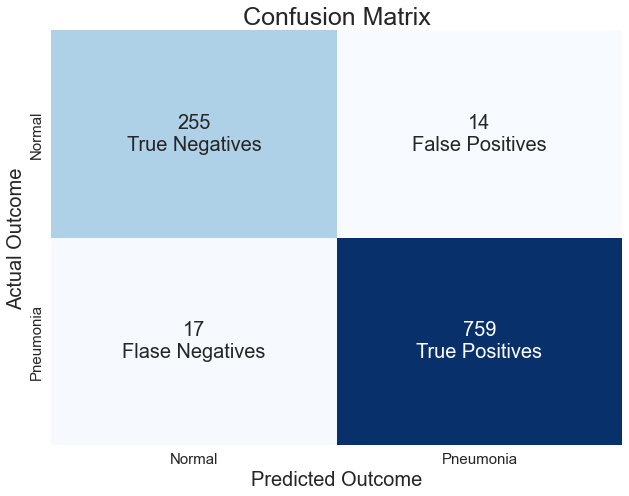

In [18]:
# plotting confusion matrix
plt.figure(figsize=(25,7))
plt.subplot(131)
ax = sns.heatmap(confusion_matrix(test_generator.labels, prediction.round()),
            annot = True, annot_kws={"size":20}, fmt="d",cmap = "Blues",cbar=False)
cmlabels = ['True Negatives', "False Positives",
               'Flase Negatives', "True Positives"]
for i,t in enumerate(ax.texts):
  t.set_text(t.get_text() + "\n" + cmlabels[i])
plt.title('Confusion Matrix', size=25)
plt.xlabel('Predicted Outcome', size=20)
plt.ylabel('Actual Outcome', size=20)
labels = ['Normal', 'Pneumonia']
ax.set_xticklabels(labels, size=15)
ax.set_yticklabels(labels, size=15)
plt.tight_layout()
plt.show();

In [19]:
print(classification_report(y_true, prediction))

              precision    recall  f1-score   support

           0       0.94      0.95      0.94       269
           1       0.98      0.98      0.98       776

    accuracy                           0.97      1045
   macro avg       0.96      0.96      0.96      1045
weighted avg       0.97      0.97      0.97      1045

